<a href="https://colab.research.google.com/github/nirob271/learning-ml-dl-fl/blob/main/Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error



In [2]:
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


# ** Dataset Preview **

In [87]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Housing.csv')

In [88]:
print(f"Number of houses: {df.shape[0]}")
print(f"\nfirst 3 houses: \n{df.head(3)}")

Number of houses: 545

first 3 houses: 
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  


In [89]:
print("Columns:")
print(df.columns)
print("Data types:")
print(df.dtypes)


Columns:
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
Data types:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


# **Encoding**

In [91]:
from sklearn.preprocessing import LabelEncoder


encoders = {}
cat_cols = ['mainroad','guestroom','basement',
            'hotwaterheating','airconditioning',
            'prefarea','furnishingstatus']

for col in cat_cols:
    le = LabelEncoder()
    # Fit the encoder on the original string values from the reloaded df
    le.fit(df[col])
    encoders[col] = le
    # Transform the column in df using the fitted encoder
    df[col] = le.transform(df[col])

print("After encoding mainroad values:", df['mainroad'].head())

After encoding mainroad values: 0    1
1    1
2    1
3    1
4    1
Name: mainroad, dtype: int64


# ** Train Test Split**

In [92]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state = 20
)

print(f"\nWe will train with: {len(X_train)} samples")
print(f"We will test with: {len(X_test)} samples")


We will train with: 436 samples
We will test with: 109 samples


#  **Scaling**

In [93]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




# **Model**

In [94]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
print("✅ Model trained!")
# Check accuracy on training data
train_score = model.score(X_train_scaled, y_train)
print(f"Training accuracy: {train_score:.1%}")
# Check accuracy on test data
test_score = model.score(X_test_scaled, y_test)
print(f"Test accuracy: {test_score:.1%}")

✅ Model trained!
Training accuracy: 67.5%
Test accuracy: 67.9%


In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")


MSE: 1188685784790.70
MAE: 829887.20


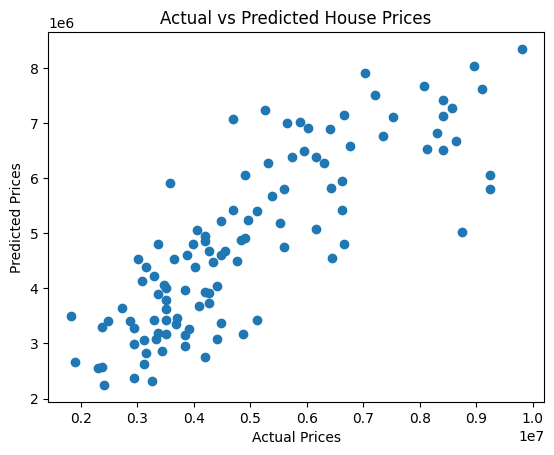

In [99]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


# **Prediction**

In [100]:
import pandas as pd # Ensure pandas is imported for DataFrame creation

# Define the new house data here for reproducibility
new_house = pd.DataFrame({
    'area': [5000],
    'bedrooms': [3],
    'bathrooms': [2],
    'stories': [2],
    'mainroad': ['yes'],
    'guestroom': ['no'],
    'basement': ['yes'],
    'hotwaterheating': ['no'],
    'airconditioning': ['yes'],
    'parking': [2],
    'prefarea': ['yes'],
    'furnishingstatus': ['furnished']
})

# ensure same column order as the training data (excluding 'price')
new_house = new_house[df.drop('price', axis=1).columns]

# encode categorical features using the same encoders fitted during training
for col in cat_cols: # cat_cols is defined in the encoding cell
    new_house[col] = encoders[col].transform(
        new_house[col].astype(str)
    )

# scale numerical features using the same scaler fitted during training
new_house_scaled = scaler.transform(new_house)

# predict the price
predicted_price = model.predict(new_house_scaled)
print(f"Predicted price: {predicted_price[0]:.2f}")

Predicted price: 7356540.01
